# EDA: Card Transaction Analytics

## Project Overview
Analysis of credit card transaction data to identify trends, KPIs, and unusual patterns for reporting and monitoring purposes.

## Scope
- Focus on business-oriented insights
- Descriptive analytics only
- Monitoring of unusual transactions (spikes, high amounts)


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# settings
sns.set_theme(style="whitegrid")
%matplotlib inline

In [20]:
# load data
df = pd.read_csv('../data/raw/credit_card_transactions.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.18,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01,-82.05,0,28705.00
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.21,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.16,-118.19,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.26,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15,-112.15,0,83236.00
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.11,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.03,-112.56,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.46,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.67,-78.63,0,22844.00


In [21]:
# rows and columns
df.shape

(1296675, 24)

In [22]:
# data types
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
merch_zipcode            float64
dtype: object

In [23]:
# missed data
df.isnull().sum()

Unnamed: 0                    0
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
dtype: int64

In [24]:
# unique values
df.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
merch_zipcode              28336
dtype: int64

Preprocessing part

In [25]:
# delete unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'dob', 'trans_num'])

In [26]:
# convert object date types -> category
cat_cols = ['merchant','category', 'gender', 'city', 'state', 'job']
df[cat_cols] = df[cat_cols].astype('category')

In [27]:
# convert time column
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
df['hour'] = df['trans_date_trans_time'].dt.hour

In [28]:
# check types
df.dtypes

trans_date_trans_time    datetime64[ns]
merchant                       category
category                       category
amt                             float64
gender                         category
city                           category
state                          category
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                            category
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
merch_zipcode                   float64
year                              int32
month                             int32
day_of_week                      object
hour                              int32
dtype: object

In [29]:
# convert day_of_week -> category
df['day_of_week'] = df['day_of_week'].astype('category')

In [36]:
# EDA - Numerical Variables
pd.options.display.float_format = '{:.2f}'.format

num_cols = ['amt', 'zip', 'city_pop', 'unix_time', 'is_fraud', 'year','month', 'hour']
df[num_cols].describe()

,amt,zip,city_pop,unix_time,is_fraud,year,month,hour
count,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00
mean,70.35,48800.67,88824.44,1349243636.73,0.01,2019.29,6.14,12.80
std,160.32,26893.22,301956.36,12841278.42,0.08,0.45,3.42,6.82
min,1.00,1257.00,23.00,1325376018.00,0.00,2019.00,1.00,0.00
25%,9.65,26237.00,743.00,1338750742.50,0.00,2019.00,3.00,7.00
50%,47.52,48174.00,2456.00,1349249747.00,0.00,2019.00,6.00,14.00
75%,83.14,72042.00,20328.00,1359385375.50,0.00,2020.00,9.00,19.00
max,28948.90,99783.00,2906700.00,1371816817.00,1.00,2020.00,12.00,23.00


In [31]:
# EDA - Categorical Variables
df[cat_cols].describe()

,merchant,category,gender,city,state,job
count,1296675,1296675,1296675,1296675,1296675,1296675
unique,693,14,2,894,51,494
top,fraud_Kilback LLC,gas_transport,F,Birmingham,TX,Film/video editor
freq,4403,131659,709863,5617,94876,9779


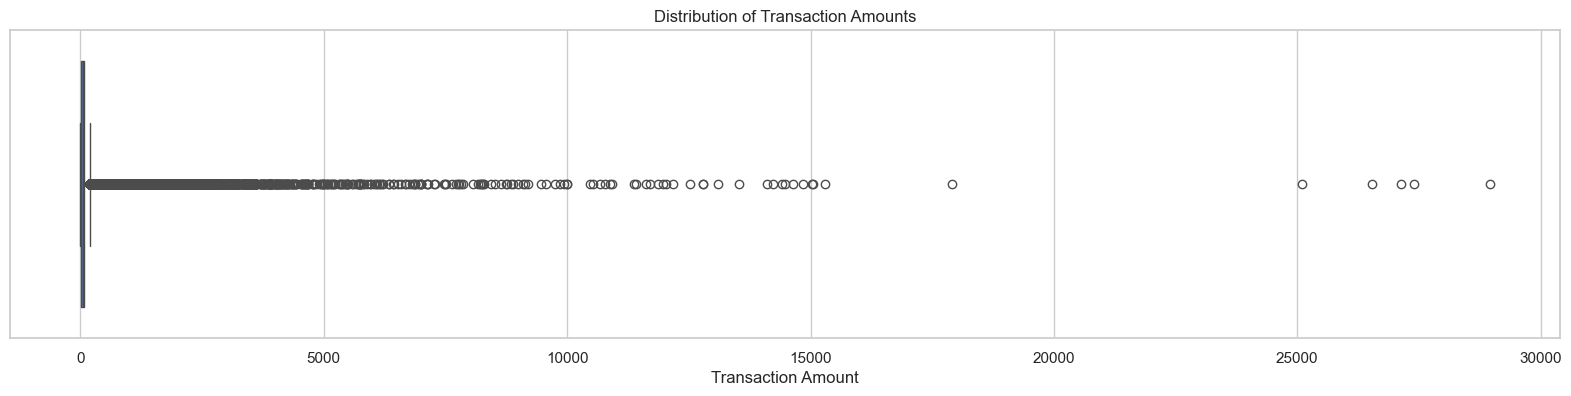

In [32]:
# distributions
plt.close('all')

fig, ax = plt.subplots(figsize=(20, 4))
sns.boxplot(x=df['amt'], ax=ax)

ax.set_title('Distribution of Transaction Amounts')
ax.set_xlabel('Transaction Amount')

plt.show()

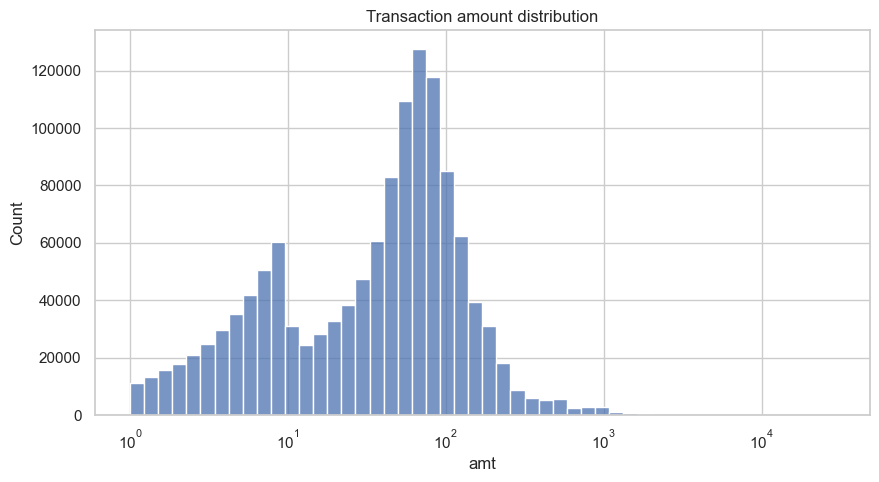

In [33]:
fig, ax = plt.subplots(figsize=(10,5))

sns.histplot(df['amt'],bins=50, log_scale=True, ax=ax)
ax.set_title('Transaction amount distribution')
plt.show()

KPI

In [34]:
# number of transactions
num_trans = df.shape[0]

# total amount
total_amt = df['amt'].sum()

# avarage amount
avg_amt = df['amt'].mean()

print('Number of transactions: ',num_trans)
print('Total amount: ',total_amt)
print('Avarage amount: ',round(avg_amt,2))


Number of transactions:  1296675
Total amount:  91222428.9
Avarage amount:  70.35


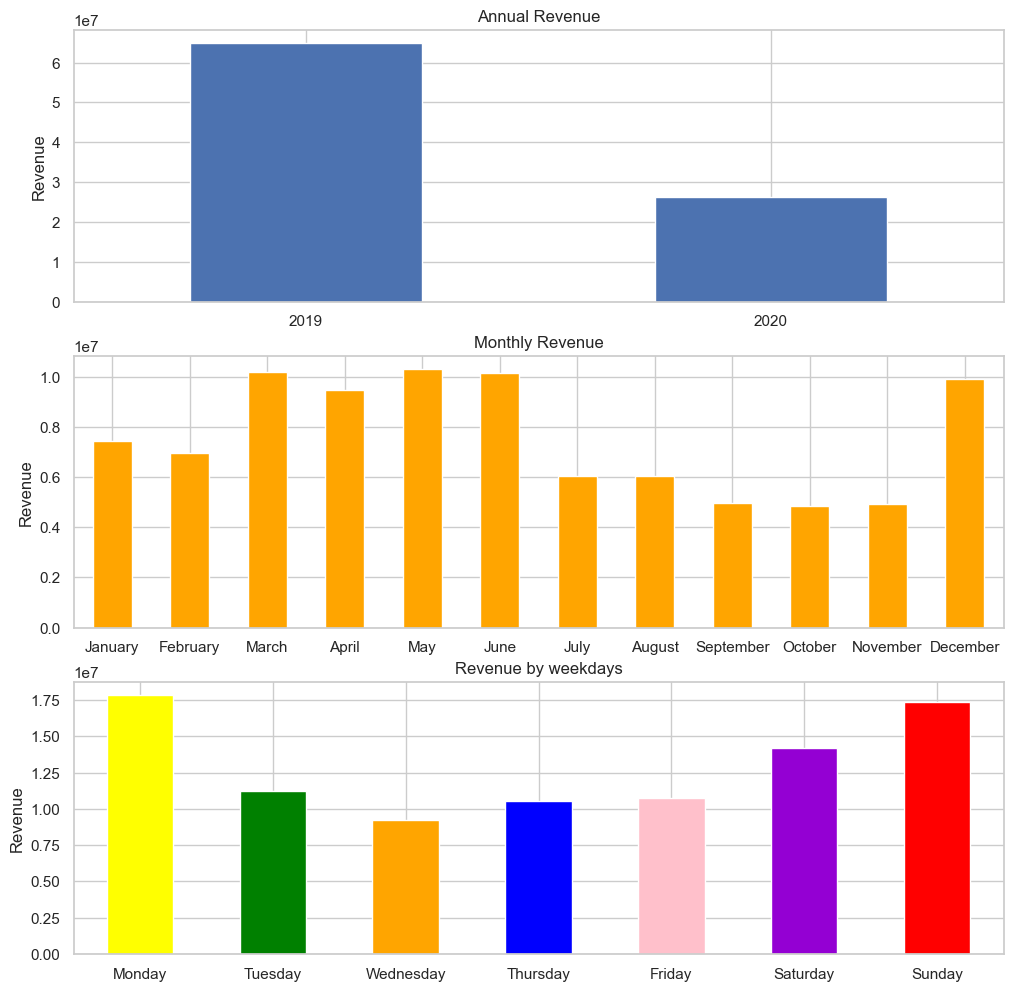

In [ ]:
# Seasonal trends

plt.close('all')
colors = ('yellow','green','orange','blue','pink','darkviolet','red')

# set order of weekdays
weekday_order = [
    'Monday', 'Tuesday', 'Wednesday',
    'Thursday', 'Friday', 'Saturday', 'Sunday'
]
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=weekday_order, ordered=True)

# set order of months
month_map = {
    1: 'January', 2: 'February', 3: 'March',
    4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September',
    10: 'October', 11: 'November', 12: 'December'
}

df['month_name'] = df['month'].map(month_map)
month_order = [
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
]

df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

# visualization
fig, ax = plt.subplots(nrows=3,figsize=(12,12))

# annual revenue
df.groupby('year',observed=True)['amt'].sum().plot(kind='bar', title='Annual Revenue',ax=ax[0])
ax[0].tick_params('x',rotation=0)
ax[0].set_xlabel('')
ax[0].set_ylabel('Revenue')

# monthly revenue
df.groupby('month_name',observed=True)['amt'].sum().plot(kind='bar', title='Monthly Revenue', color='orange', ax=ax[1])
ax[1].tick_params('x',rotation=0)
ax[1].set_xlabel('')
ax[1].set_ylabel('Revenue')

# weekdays
df.groupby('day_of_week', observed=True)['amt'].sum().plot(kind='bar', title='Revenue by weekdays', color=colors, ax=ax[2])
ax[2].tick_params('x',rotation=0)
ax[2].set_xlabel('')
ax[2].set_ylabel('Revenue')

plt.show()


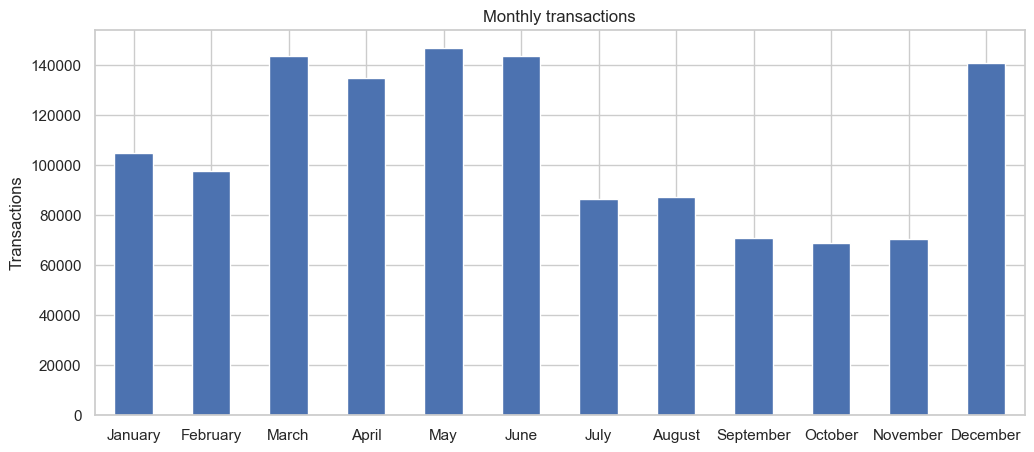

In [68]:
# number of transactions
plt.close('all')
fig, ax = plt.subplots(nrows=1,figsize=(12,5))

df.groupby('month_name', observed=True)['amt'].count().plot(kind='bar', title='Monthly transactions', ylabel='Transactions', ax=ax)
ax.tick_params('x',rotation=0)
ax.set_xlabel('')

plt.show()